In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfcases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
dfTrack = pd.read_csv("https://api.vitaldb.net/trks")  # track list
dflabs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans


# A1. If your project deals with a regression problem, please use one attribute of your dataset (X_train) along with the target values (y_train) for training a linear regression model.

In [23]:
def a1():
    X = dfcases[['weight','age']]
    y = dfcases['bmi']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    reg = LinearRegression().fit(X_train, y_train)

    y_train_pred = reg.predict(X_train)
    X = dfcases[['weight']]  # This will be the predictor
    y = dfcases['height']  # This will be the target
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    # Train the regression model
    reg = LinearRegression().fit(X_train, y_train)
    # Predict on the training data
    y_train_pred = reg.predict(X_train)
    return y_train, y_train_pred,X_train, X_test, y_train, y_test


In [24]:
a1()

(2951    169.8
 5463    155.6
 3270    159.7
 5700    166.8
 3553    164.6
         ...  
 4931    150.9
 3264    154.0
 1653    153.8
 2607    152.9
 2732    153.0
 Name: height, Length: 5110, dtype: float64,
 array([168.84768921, 157.1988267 , 162.68064435, ..., 160.77179714,
        154.36002828, 159.15661872]),
       weight
 2951    75.0
 5463    51.2
 3270    62.4
 5700    48.3
 3553    56.6
 ...      ...
 4931    49.6
 3264    60.3
 1653    58.5
 2607    45.4
 2732    55.2
 
 [5110 rows x 1 columns],
       weight
 4551   49.90
 2369   45.60
 5586   59.30
 472    85.75
 880    51.90
 ...      ...
 4544   84.20
 3131   49.90
 4713   57.90
 5727   70.80
 3791   60.10
 
 [1278 rows x 1 columns],
 2951    169.8
 5463    155.6
 3270    159.7
 5700    166.8
 3553    164.6
         ...  
 4931    150.9
 3264    154.0
 1653    153.8
 2607    152.9
 2732    153.0
 Name: height, Length: 5110, dtype: float64,
 4551    166.0
 2369    153.7
 5586    171.3
 472     183.0
 880     176.0
      

#Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.Perform prediction on the test data and compare the metric values between train and test set.


In [25]:
def a2():
    y_train, y_train_pred,X_train, X_test, y_train, y_test = a1()
    mse_train = mean_squared_error(y_train, y_train_pred)  # Calculating MSE
    rmse_train = np.sqrt(mse_train)  # Calculating RMSE
    r2_train = r2_score(y_train, y_train_pred)  # Calculating R^2
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)# Calculating MAPE for training data

    reg = LinearRegression().fit(X_train, y_train)

    y_test_pred = reg.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred) # Calculating MSE for test data
    rmse_test = np.sqrt(mse_test) # Calculating RMSE for test data
    r2_test = r2_score(y_test, y_test_pred) # Calculating R^2 for test data
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred) # Calculating MAPE for test data
    return mse_train, rmse_train, r2_train, mape_train, mse_test, rmse_test, r2_test, mape_test


# 3. Repeat the exercises A1 and A2 with more than one attribute or all attributes


In [26]:
def a3():
    X = dfcases[['weight', 'age', 'height']] # This will be predictor
    y = dfcases['bmi'] # This will be Target

    # Training and Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    reg = LinearRegression().fit(X_train, y_train)


    y_train_pred = reg.predict(X_train)

    y_test_pred = reg.predict(X_test)
    # Calculating MSE RMSE R^2 and MAPE for training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    r2_train = r2_score(y_train, y_train_pred)
    # Calculating MSE RMSE R^2 and MAPE for test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    r2_test = r2_score(y_test, y_test_pred)
    return mse_train, rmse_train, r2_train, mape_train, mse_test, rmse_test, r2_test, mape_test


# Perform k-means clustering on your data.


In [27]:
def a4():
    # Perform k-means clustering with a specified number of clusters
    X = dfcases[['weight', 'age', 'height']]
    kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X)

    # Get the cluster labels
    labels = kmeans.labels_


    cluster_centers = kmeans.cluster_centers_


    dfcases['cluster'] = labels
    return labels, cluster_centers


# For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.


In [28]:
def a5():
    labels, cluster_centers = a4()
    
    X = dfcases[['weight', 'age', 'height']]  # This will be predictor
    silhouette_avg = silhouette_score(X, labels)
    calinski_harabasz_avg = calinski_harabasz_score(X, labels)
    davies_bouldin_avg = davies_bouldin_score(X, labels)
    return silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg


In [29]:
def a6():
    X = dfcases[['weight', 'age', 'height']]  # This will be predictor  
    k_values = range(2, 11)


    silhouette_scores = []
    calinski_harabasz_scores = []
    davies_bouldin_indices = []


    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X)
        labels = kmeans.labels_

        silhouette_scores.append(silhouette_score(X, labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))
        davies_bouldin_indices.append(davies_bouldin_score(X, labels))

    plt.figure(figsize=(15, 5))

    # Silhouette Score plot
    plt.subplot(1, 3, 1)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.title('Silhouette Score vs. k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')

    # Calinski-Harabasz Score plot
    plt.subplot(1, 3, 2)
    plt.plot(k_values, calinski_harabasz_scores, marker='o')
    plt.title('Calinski-Harabasz Score vs. k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Calinski-Harabasz Score')

    # Davies-Bouldin Index plot
    plt.subplot(1, 3, 3)
    plt.plot(k_values, davies_bouldin_indices, marker='o')
    plt.title('Davies-Bouldin Index vs. k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Davies-Bouldin Index')

    plt.tight_layout()
    plt.show()


In [30]:
def a7(X_train):
    distortions = []
    for k in range(2,20):
        kmeans = KMeans(n_clusters=k).fit(X_train)
        distortions.append(kmeans.inertia_)
    plt.plot(distortions)

In [31]:
def main():
    #a1
    y_train, y_train_pred,X_train, X_test, y_train, y_test = a1()
    print(y_train, y_train_pred,X_train, X_test, y_train, y_test)
    #a2 for a1 data
    mse_train, rmse_train, r2_train, mape_train, mse_test, rmse_test, r2_test, mape_test = a2()
    print(mse_train, rmse_train, r2_train, mape_train, mse_test, rmse_test, r2_test, mape_test)
    #a3 for dataset

    mse_train, rmse_train, r2_train, mape_train, mse_test, rmse_test, r2_test, mape_test = a3() 

    print(mse_train, rmse_train, r2_train, mape_train, mse_test, rmse_test, r2_test, mape_test)
    #a4 for dataset
    labels, cluster_centers = a4()
    print(labels, cluster_centers)
    #a5 for dataset
    silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg = a5()   
    print(silhouette_avg, calinski_harabasz_avg, davies_bouldin_avg)
    #a6 
    a6()
    #a7
    a7(X_train)
    
    # Print the results or perform any other operations
    


2951    169.8
5463    155.6
3270    159.7
5700    166.8
3553    164.6
        ...  
4931    150.9
3264    154.0
1653    153.8
2607    152.9
2732    153.0
Name: height, Length: 5110, dtype: float64 [168.84768921 157.1988267  162.68064435 ... 160.77179714 154.36002828
 159.15661872]       weight
2951    75.0
5463    51.2
3270    62.4
5700    48.3
3553    56.6
...      ...
4931    49.6
3264    60.3
1653    58.5
2607    45.4
2732    55.2

[5110 rows x 1 columns]       weight
4551   49.90
2369   45.60
5586   59.30
472    85.75
880    51.90
...      ...
4544   84.20
3131   49.90
4713   57.90
5727   70.80
3791   60.10

[1278 rows x 1 columns] 2951    169.8
5463    155.6
3270    159.7
5700    166.8
3553    164.6
        ...  
4931    150.9
3264    154.0
1653    153.8
2607    152.9
2732    153.0
Name: height, Length: 5110, dtype: float64 4551    166.0
2369    153.7
5586    171.3
472     183.0
880     176.0
        ...  
4544    177.0
3131    152.2
4713    149.1
5727    170.0
3791    165.4
Name:

[0 0 0 ... 0 1 1] [[ 59.73576246  66.27473345 160.45221919]
 [ 64.4804034   41.92101911 165.16282803]]
0.3250413227691866 2994.659688081559 1.2650706148274513


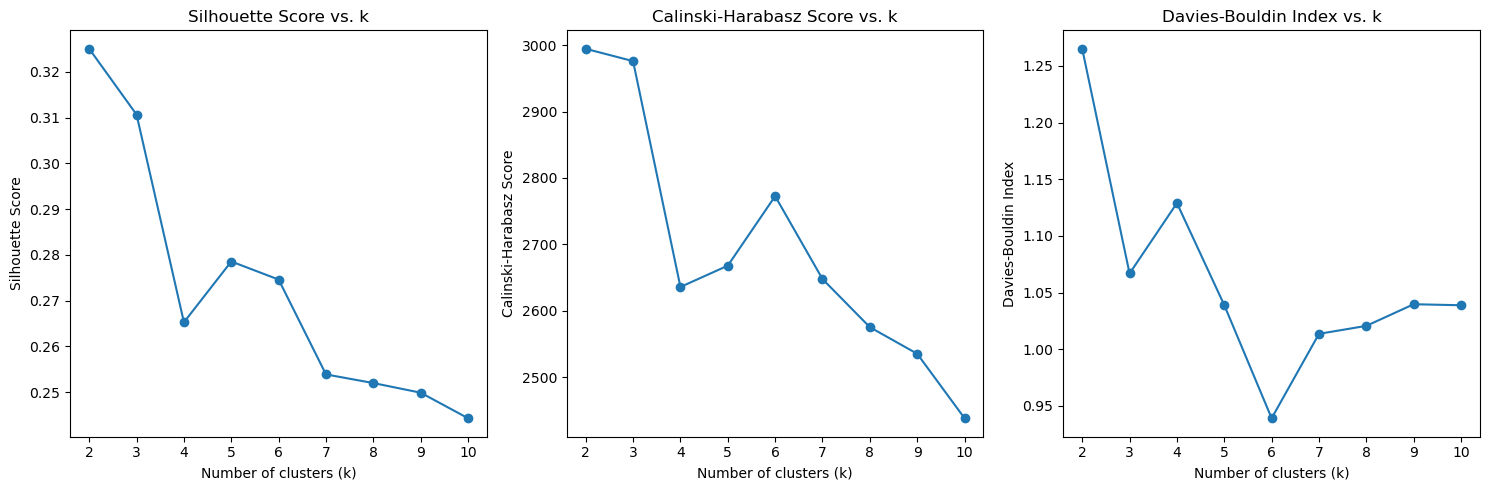

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

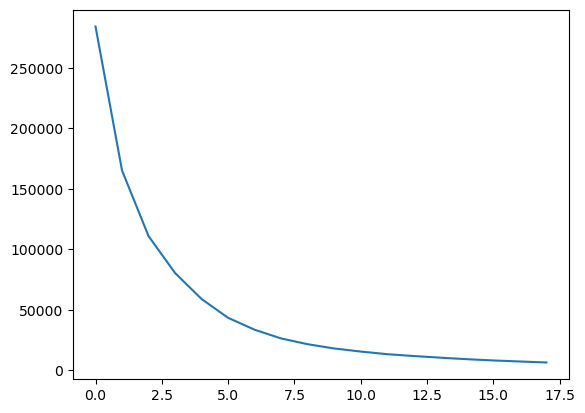

In [32]:
main()